In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

## 1. Load Data

In [6]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


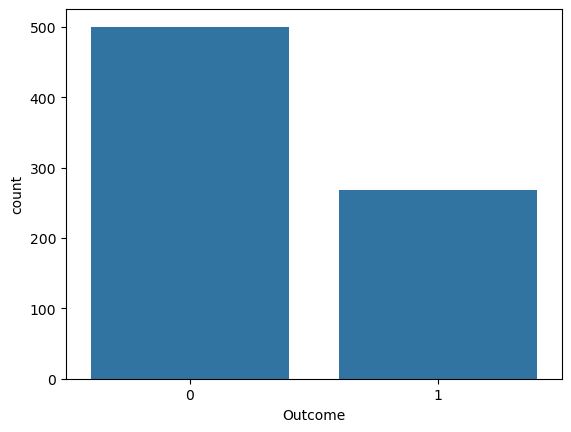

In [16]:
sns.countplot(x='Outcome', data = df);

## 2. Split data

In [21]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [25]:
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 123)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


## 3. Baseline Model

In [76]:
baseline = y_train.value_counts(normalize = True)

In [84]:
baseline_accuracy = round(baseline.max(), 2)
print(baseline_accuracy)

0.65


### Insight
- If we predict that all the people do not have diabetes, our model will be 65% accurate. We are anticipating that our model should perform better than the baseline model

## 4. Preprocessing

In [29]:
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Train Model

In [36]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [42]:
y_pred = lr.predict(X_test_scaled)
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

## 6. Evaluate Model

In [50]:
score = accuracy_score(y_test, y_pred)
print(np.round(score, 2))

0.78


### Insight
- The Logistic Regression Model is 78% accurate

## 7. Save Model and Preprocessor

In [89]:
#save model
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [91]:
#save preprocessor
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [93]:
# with open('diabetes_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)